**STOCK PRICE PREDICTION**

It uses artificial neyral network called long short term memory LSTM to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from  keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

In [2]:


# getting stock quote
df = yf.download('AAPL', start='2008-01-01', end='2025-04-04')

df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2008-01-02,5.855757,6.018651,5.786934,5.988897,1079178800
2008-01-03,5.858463,5.932396,5.791141,5.872889,842066400
2008-01-04,5.411257,5.800459,5.376394,5.753875,1455832000
2008-01-07,5.338827,5.517950,5.116125,5.447322,2072193200
2008-01-08,5.146779,5.483687,5.133255,5.413960,1523816000
...,...,...,...,...,...
2025-03-28,217.614624,223.516888,217.394911,221.379691,39818600
2025-03-31,221.839096,225.324516,215.946814,216.725791,65299300


In [3]:
#getting no. of rows,columns
df.shape

(4342, 5)

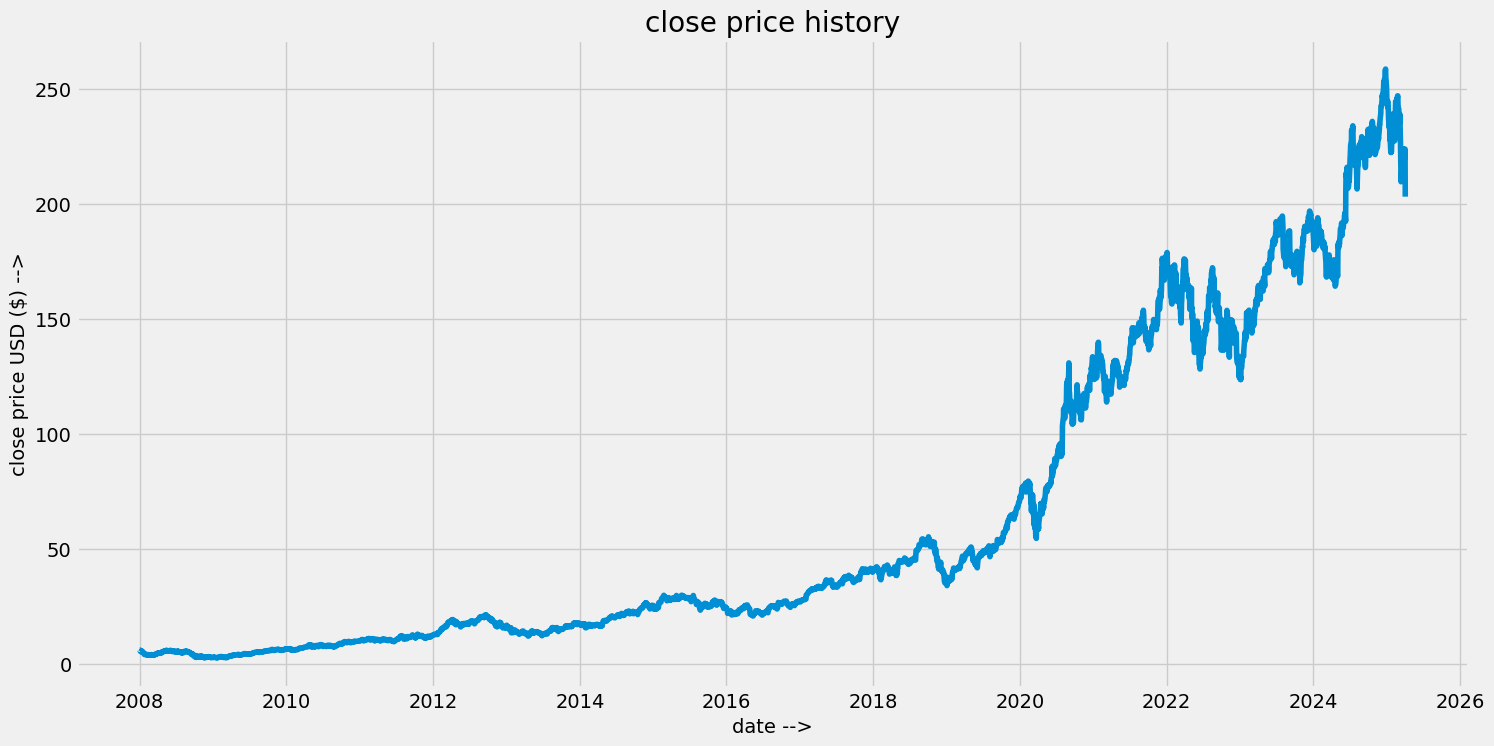

In [ ]:
#visualising closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('date -->', fontsize=14)
plt.ylabel('close price USD ($) -->', fontsize=14)
plt.show()

In [4]:
#create new dataframe with only close column
data = df.filter(['Close'])
data = df[['Close']]
#converting dataframe to numpy array
dataset = data.values
#number of rows to train model
training_data_len = math.ceil(len(dataset)*.8) #80% training
training_data_len

3474

In [5]:

#scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.01369095]
 [0.01370152]
 [0.01195494]
 ...
 [0.86135732]
 [0.86408762]
 [0.78334881]]


In [6]:
#creating training dataset
#creating scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#splitting data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i, 0])
  y_train.append(train_data[i, 0])
  if i<=101:
    print("x_train : ",x_train)
    print("y_train : ",y_train)
    print()

x_train :  [array([0.01369095, 0.01370152, 0.01195494, 0.01167206, 0.01092201,
       0.01187864, 0.01171666, 0.01109103, 0.01180586, 0.01066261,
       0.00955925, 0.00970597, 0.00976114, 0.00908974, 0.00714479,
       0.00673749, 0.00608134, 0.00608134, 0.00626093, 0.00633606,
       0.00670932, 0.00652034, 0.00627385, 0.00600505, 0.00514115,
       0.00505194, 0.00554962, 0.00601561, 0.00547686, 0.00600975,
       0.00578204, 0.00544985, 0.00516228, 0.00535477, 0.00508716,
       0.00484302, 0.00487588, 0.00480662, 0.00525383, 0.00606962,
       0.00549563, 0.00510946, 0.00544868, 0.00543342, 0.00501556,
       0.00517049, 0.00487001, 0.00576913, 0.00561419, 0.00583838,
       0.00568226, 0.00569635, 0.00641118, 0.00604143, 0.00646399,
       0.00719879, 0.00736899, 0.00784788, 0.0072833 , 0.00760726,
       0.00766477, 0.00837256, 0.00813311, 0.00861672, 0.00878926,
       0.00911909, 0.00876108, 0.00859675, 0.0089618 , 0.00809203,
       0.00816715, 0.00823758, 0.00886204, 0.00895

In [7]:
#converting x_train and y_train dataset to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#reshaping data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3374, 100, 1)

In [9]:
#bulding LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#training model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3374/3374 ━━━━━━━━━━━━━━━━━━━━ 187s 54ms/step - loss: 5.5678e-04


In [12]:
#create testing dataset
#creating new array containing values from index 1400 to 2500
test_data = scaled_data[training_data_len-100: , :]
#creating datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])

In [13]:
#converting data to numpy array
x_test = np.array(x_test)

In [14]:
#reshaping for 3 dimensional because of LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
#getting models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [16]:
#getting RMSE lower values of rmse depict better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

np.float64(2.5112442772509316)

<ipython-input-17-52a78430ded7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


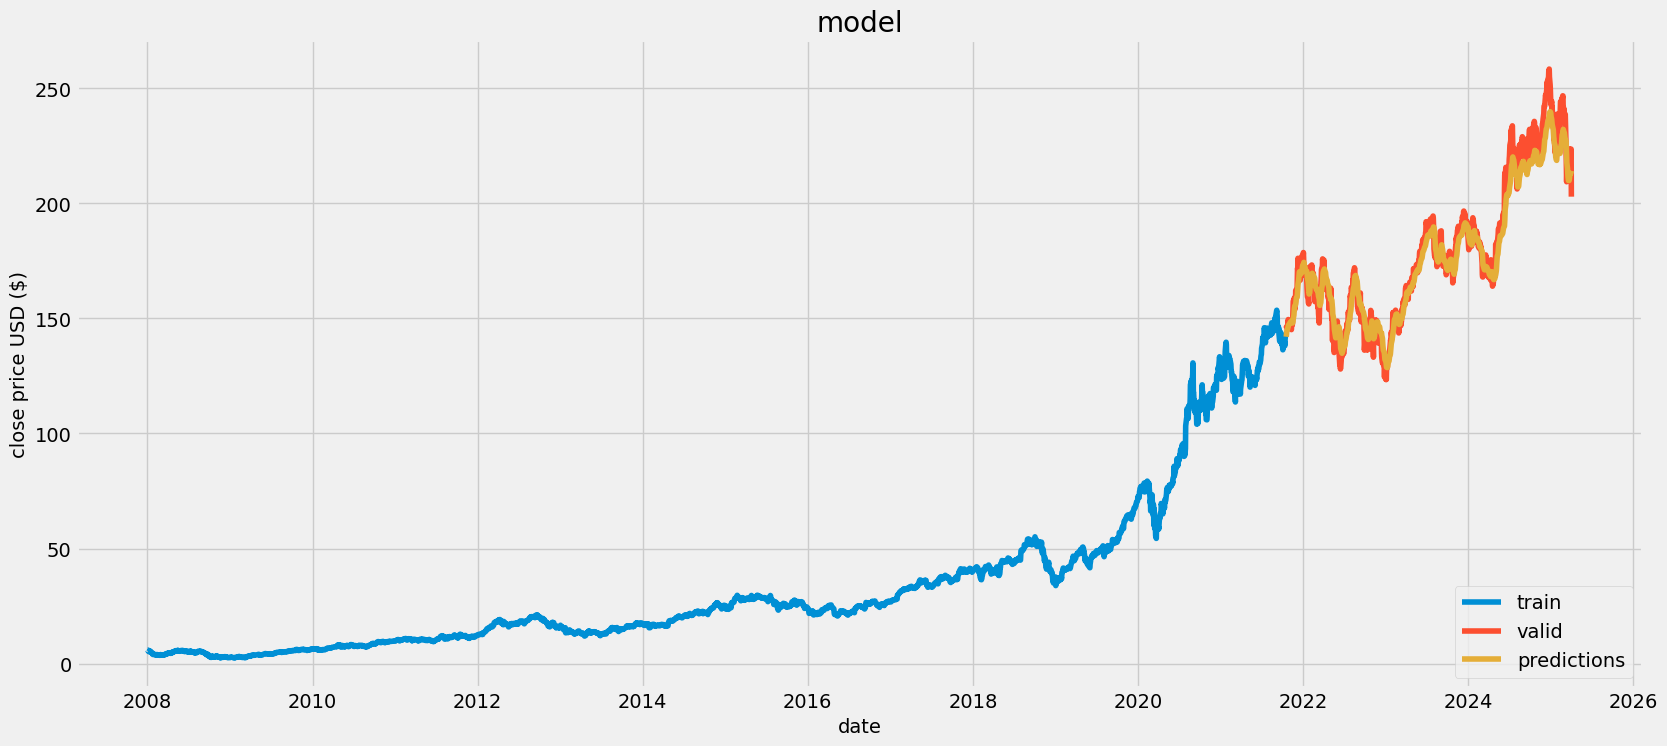

In [17]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualising
plt.figure(figsize=(18,8))
plt.title('model')
plt.xlabel('date', fontsize=14)
plt.ylabel('close price USD ($)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train', 'valid', 'predictions'], loc='lower right')
plt.show()

In [18]:
#showing actual and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2021-10-19,145.797455,142.031555
2021-10-20,146.287521,142.932953
2021-10-21,146.503159,143.879166
2021-10-22,145.728836,144.746902
2021-10-25,145.679886,145.369995
...,...,...
2025-03-28,217.614624,213.000641
2025-03-31,221.839096,212.996948


In [19]:
#get quote
apple_quote = yf.download('AAPL', start='2008-04-04', end='2025-04-04')
#creating new dataframe
new_df = apple_quote.filter(['Close'])
new_df = apple_quote[['Close']]
#get the last 60 days closing price values and converting to array
last_60_days = new_df[-60:].values

#scaling data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#creating empty list
X_test = []

#appending last 60 days
X_test.append(last_60_days_scaled)

#converting the x_train to aray
X_test = np.array(X_test)

#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#getting predicted scaled price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
[[212.03746]]


In [20]:
#getting actual close price quote
apple_quote2 = yf.download('AAPL', start='2025-04-01', end='2025-04-03')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2025-04-01  222.897705
2025-04-02  223.596786
